In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf,pacf
from datetime import datetime
from datetime import timedelta
import warnings 
warnings.filterwarnings('ignore')

In [118]:
rice_export = pd.read_csv('RiceExport.csv')
rice_export.index = pd.date_range(start='2015-1',end='2021-10',freq='M')
print(rice_export.head())
print(rice_export.tail())

             Quantity
2015-01-31  608503608
2015-02-28  732151200
2015-03-31  785891643
2015-04-30  700010950
2015-05-31  945597070
             Quantity
2021-05-31  319279915
2021-06-30  389335040
2021-07-31  419580147
2021-08-31  591716954
2021-09-30  638405299


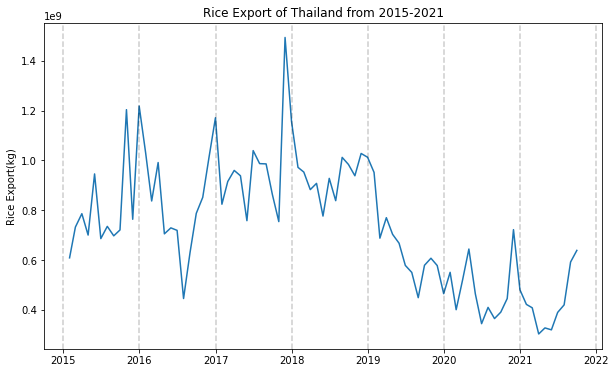

In [119]:
start_date = datetime(2015,1,1)
end_date = datetime(2021,10,1)
plt.figure(figsize=(10,6))
plt.plot(rice_export)
for year in range(start_date.year,end_date.year+2):
    plt.axvline(pd.to_datetime(str(year)),color='k',alpha=0.2,linestyle='--')
plt.title('Rice Export of Thailand from 2015-2021')
plt.ylabel('Rice Export(kg)')
plt.show()

In [120]:
lim_rice_export = rice_export.truncate(before='2015',after='2019')
lim_rice_export.head()

,Quantity
2015-01-31,608503608
2015-02-28,732151200
2015-03-31,785891643
2015-04-30,700010950
2015-05-31,945597070


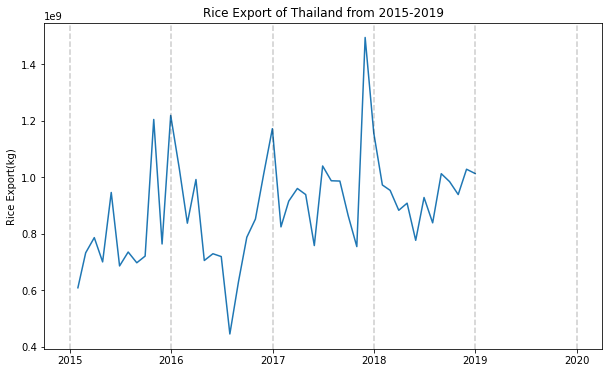

In [121]:
start_date = datetime(2015,1,1)
end_date = datetime(2019,10,1)
plt.figure(figsize=(10,6))
plt.plot(lim_rice_export)
for year in range(start_date.year,end_date.year+2):
    plt.axvline(pd.to_datetime(str(year)),color='k',alpha=0.2,linestyle='--')
plt.title('Rice Export of Thailand from 2015-2019')
plt.ylabel('Rice Export(kg)')
plt.show()

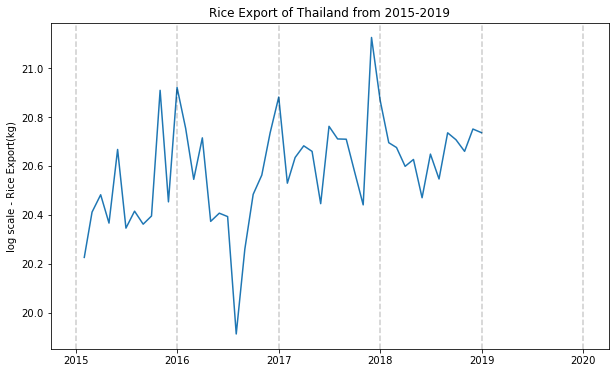

In [122]:
log_lim_rice_export = np.log(lim_rice_export)
start_date = datetime(2015,1,1)
end_date = datetime(2019,10,1)
plt.figure(figsize=(10,6))
plt.plot(log_lim_rice_export)
for year in range(start_date.year,end_date.year+2):
    plt.axvline(pd.to_datetime(str(year)),color='k',alpha=0.2,linestyle='--')
plt.title('Rice Export of Thailand from 2015-2019')
plt.ylabel('log scale - Rice Export(kg)')
plt.show()

In [123]:
train_data = log_lim_rice_export[:-3]
test_data = log_lim_rice_export[-3:]

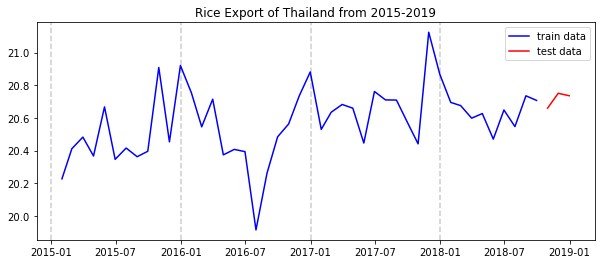

In [124]:
start_date = datetime(2015,1,1)
end_date = datetime(2019,1,1)
plt.figure(figsize=(10,4))
plt.plot(train_data,color='blue',label='train data')
plt.plot(test_data,color='red',label='test data')
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)),color='k',alpha=0.2,linestyle='--')
plt.legend()
plt.title('Rice Export of Thailand from 2015-2019')
plt.show()


In [125]:
# H0 : it is not stationary
# Ha : it is a staionary
def adfuller_test(ts):
    result = adfuller(ts)
    labels = ['ADF test Statistics','p-value','#Lags used', 'Number of Observation Used']
    for value,label in zip(result,labels):
        print(label,':',value)
    if result[1] <= 0.05:
        print('Strong evidence against the null hypothesis(H0), reject the null hypothesis. Data has no unit root and is stationary')
    else:
        print('weak evidence against the null hypothesis, fail to reject H0. time series has a unit root, indicating it is not stationary')

In [126]:
adfuller_test(train_data)

ADF test Statistics : -4.757481592072612
p-value : 6.554120223203947e-05
#Lags used : 0
Number of Observation Used : 44
Strong evidence against the null hypothesis(H0), reject the null hypothesis. Data has no unit root and is stationary


Stationary

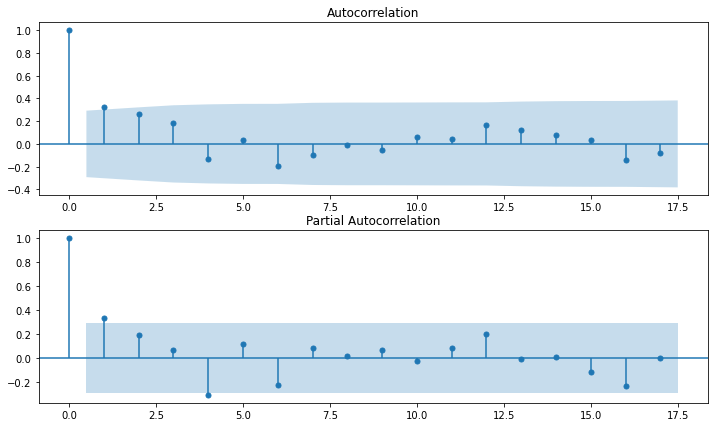

In [127]:
fig = plt.figure(figsize=(12,7))
ax1 = fig.add_subplot(2,1,1)
plot_acf(train_data,ax=ax1)
ax2 = fig.add_subplot(2,1,2)
plot_pacf(train_data,ax=ax2)
plt.show()

In [128]:
my_order = (1,0,1)
my_seasonal_order = (1,0,1,4)
model1 = SARIMAX(train_data,order=my_order,seasonal_order=my_seasonal_order)
model1_fit = model1.fit()

In [132]:
start_pred = len(train_data.index)
end_pred = len(train_data.index)+6
model1_pred = model1_fit.predict(start = start_pred, end = end_pred,dynamic=True)
model1_pred

2018-10-31    20.704104
2018-11-30    20.699106
2018-12-31    20.723671
2019-01-31    20.651701
2019-02-28    20.697514
2019-03-31    20.692559
2019-04-30    20.717166
Freq: M, Name: predicted_mean, dtype: float64

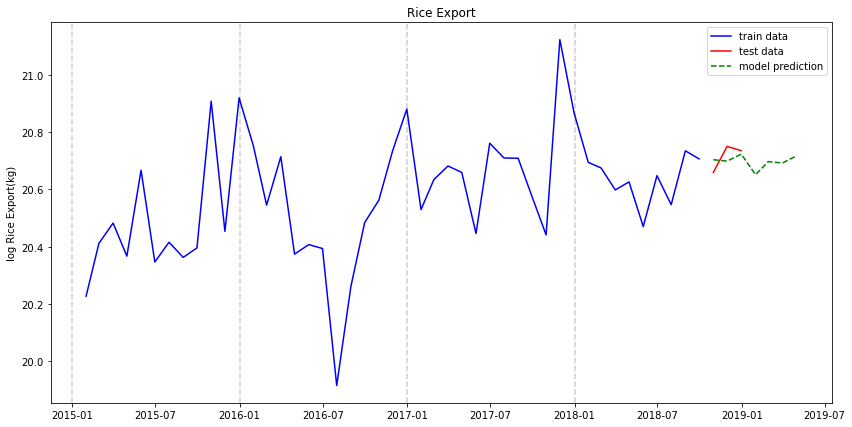

In [136]:
start_date = datetime(2015,1,1)
end_date = datetime(2019,1,1)
plt.figure(figsize=(14,7))
plt.plot(train_data,color='blue',label='train data')
plt.plot(test_data,color='red',label='test data')
plt.plot(model1_pred,color='green',label='model prediction',linestyle='--')
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)),color='k',alpha=0.2,linestyle='--')
plt.legend()
plt.ylabel('log Rice Export(kg)')
plt.title('Rice Export')
plt.show()

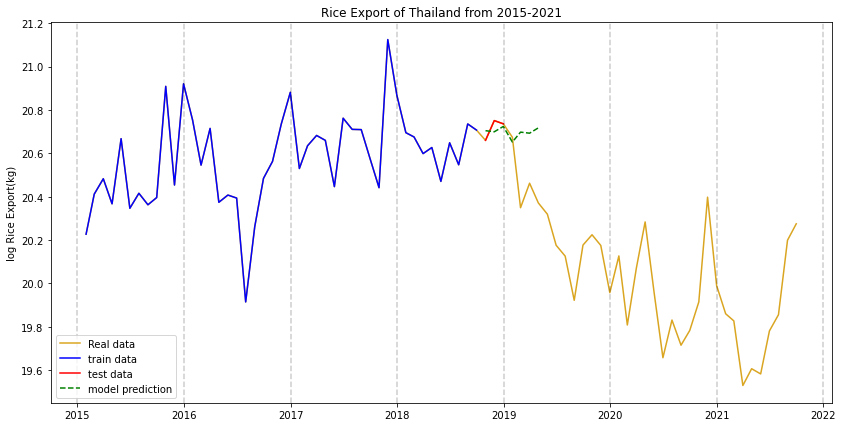

In [135]:
start_date = datetime(2015,1,1)
end_date = datetime(2021,10,1)
plt.figure(figsize=(14,7))
plt.plot(np.log(rice_export),label='Real data',color='goldenrod')
plt.plot(train_data,color='blue',label='train data')
plt.plot(test_data,color='red',label='test data')
plt.plot(model1_pred,color='green',label='model prediction',linestyle='--')
for year in range(start_date.year,end_date.year+2):
    plt.axvline(pd.to_datetime(str(year)),color='k',alpha=0.2,linestyle='--')
plt.title('Rice Export of Thailand from 2015-2021')
plt.ylabel('log Rice Export(kg)')
plt.legend()
plt.show()